### selenium 라이브러리
1. 웹 어플리케이션을 테스트하기 위한 라이브러리
2. python에서 웹브라우져를 제어하기 위한 라이브러리
3. 크롬의 구버전은 웹드라이버라는 별도의 소프트웨어가 필요

In [1]:
!pip install selenium

In [2]:
# 라이브러리 로드
from selenium import webdriver

In [3]:
driver = webdriver.Chrome()

In [4]:
# 웹 브라우저에 주소값을 입력해서 요청
driver.get("https://www.naver.com")

In [5]:
# HTML TAG들에 접근하기 위한 기능 로드

# By는 TAG들의 속성 값들에 접근하기 위한 기능
from selenium.webdriver.common.by import By

# Keys는 키보드 입력방식에 접근하기 위한 기능
from selenium.webdriver.common.keys import Keys

In [6]:
# 네이버에 있는 검색창(TAG, element)을 선택
# id가 query인 element를 선택
element = driver.find_element(By.ID, 'query')

In [7]:
# 검색어창에 특정한 문자열을 입력
element.send_keys('노원맛집')

In [8]:
# 엔터키를 입력
element.send_keys(Keys.ENTER)

In [9]:
# class가 Ink_head인 element중 첫번째 element
element2 = driver.find_element(By.CLASS_NAME, 'lnk_head')


In [10]:
element2.click()

In [12]:
# 웹브라우져의 탭의 정보를 모두 확인
all_window = driver.window_handles

In [15]:
# 자식창으로 이동
driver.switch_to.window(all_window[1])

In [16]:
element3 = driver.find_element(By.CLASS_NAME, 'quick03')

In [17]:
element3.click()

In [18]:
# 웹브라우져의 html을 로드
driver.page_source

'<html lang="ko"><head>\n  <meta http-equiv="Content-Type" content="text/html;" charset="UTF-8">\n  <meta name="Author" content="">\n  <meta name="Keywords" content="씨앤피물류, c&amp;p, 씨앤피, 무봉리순대국, 하나샤브샤브, 카페아를, 브래드팩토리, 지베르니, 씨앤피물류, 프랜차이즈, 외식창업, 순대국브랜드, 외식브랜드">\n  <meta name="Description" content="씨앤피물류는 친숙하게 자리잡은 무봉리토종순대국을 시작으로 일식 프리미엄 레스토랑 ‘하나샤브샤브’ 블루리본서베이에 등록된 ‘카페아를’ 자연속의 빵공장 ‘브래드 팩토리’ 등 다양한 외식사업과 전국적인 유통이 가능한 물류센터 를 운영하고 있습니다.">\n  <meta property="og:url" content="">\n  <meta property="og:title" content="씨앤피물류">\n  <meta property="og:site_name" content="씨앤피물류">\n  <meta property="og:image" content="https://cnp-inc.com/common/img/link.jpg">\n  <meta property="og:description" content="씨앤피물류는 친숙하게 자리잡은 무봉리토종순대국을 시작으로 일식 프리미엄 레스토랑 ‘하나샤브샤브’ 블루리본서베이에 등록된 ‘카페아를’ 자연속의 빵공장 ‘브래드 팩토리’ 등 다양한 외식사업과 전국적인 유통이 가능한 물류센터 를 운영하고 있습니다.">\n  <meta property="og:url" content="https://cnp-inc.com">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user

In [19]:
from bs4 import BeautifulSoup as bs

In [20]:
# driver에 있는 page_source를 BeautifulSoup에서 사용하기 위해 데이터를 변환
soup = bs(driver.page_source, 'html.parser')

In [21]:
soup

<html lang="ko"><head>
<meta charset="utf-8" content="text/html;" http-equiv="Content-Type"/>
<meta content="" name="Author"/>
<meta content="씨앤피물류, c&amp;p, 씨앤피, 무봉리순대국, 하나샤브샤브, 카페아를, 브래드팩토리, 지베르니, 씨앤피물류, 프랜차이즈, 외식창업, 순대국브랜드, 외식브랜드" name="Keywords"/>
<meta content="씨앤피물류는 친숙하게 자리잡은 무봉리토종순대국을 시작으로 일식 프리미엄 레스토랑 ‘하나샤브샤브’ 블루리본서베이에 등록된 ‘카페아를’ 자연속의 빵공장 ‘브래드 팩토리’ 등 다양한 외식사업과 전국적인 유통이 가능한 물류센터 를 운영하고 있습니다." name="Description"/>
<meta content="" property="og:url"/>
<meta content="씨앤피물류" property="og:title"/>
<meta content="씨앤피물류" property="og:site_name"/>
<meta content="https://cnp-inc.com/common/img/link.jpg" property="og:image"/>
<meta content="씨앤피물류는 친숙하게 자리잡은 무봉리토종순대국을 시작으로 일식 프리미엄 레스토랑 ‘하나샤브샤브’ 블루리본서베이에 등록된 ‘카페아를’ 자연속의 빵공장 ‘브래드 팩토리’ 등 다양한 외식사업과 전국적인 유통이 가능한 물류센터 를 운영하고 있습니다." property="og:description"/>
<meta content="https://cnp-inc.com" property="og:url"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no" name="viewport"/>
<meta co

In [25]:
privacy_data = soup.find('div', 
          attrs={
              'class' : 'privacy_wrap'
          }
).get_text()

In [26]:
type(privacy_data)

str

In [27]:
privacy_data = privacy_data.replace('\n', '')

'제1조(목적) 이 약관은 (주)씨앤피물류 (C&P) 회사(전자거래 사업자)가 운영하는 (주)씨앤피물류 (C&P) 사이버 몰(이하 "몰"이라 한다)에서 제공하는 인터넷 관련 서비스 (이하 "서비스"라 한다)를 이용함에 있어 사이버몰과 이용자의 권리ㆍ의무 및 책임사항을 규정함을 목적으로 합니다. ※ 「PC통신등을 이용하는 전자거래에 대해서도 그 성질에 반하지 않는 한 이 약관을 준용합니다. 제2조(정의)"몰"이란 (주)씨앤피물류 (C&P) 회사가 재화 또는 용역을 이용자에게 제공하기 위하여 컴퓨터등 정보통신설비를 이용하여 재화 또는 용역을 거래할수 있도록 설정한 가상의 영업장을 말하며, 아울러 사이버몰을 운영하는 사업자의 의미로도 사용합니다."이용자"란 "몰"에 접속하여 이 약관에 따라 "몰"이 제공하는 서비스를 받는 회원 및 비회원을 말합니다.‘회원’이라 함은 "몰"에 개인정보를 제공하여 회원등록을 한 자로서, 계속적으로 “몰”이 제공하는 서비스를 이용할 수 잇는 자를 말합니다.‘비회원’이라 함은 회원에 가입하지 않고 "몰"이 제공하는 서비스를 이용하는 자를 말합니다.제3조(약관등의 명시와 설명 및 개정)"몰"은 이 약관의 내용과 상호 및 대표자 성명, 영업소 소재지 주소(소비자의 불만을 처리할 수 있는 곳의 주소를 포함), 전화번호ㆍ모사전송번호ㆍ전자우편주소, 사업자등록번호, 통신판매업신고번호, 개인정보관리책임자등을 이용자가 쉽게 알 수 있도록 "몰"의 초기서비스화면(전면)에 게시합니다. 다만, 약관의 내용은 이용자가 연결화면을 통하여 볼 수 있도록 할 수 있습니다."몰"은 이용자가 약관에 동의하기에 앞서 약관에 정하여져 있는 내용 중 청약철회ㆍ배송책임ㆍ환불조건 등과 같은 중요한 내용을 이용자가 이해할 수 있도록 별도의 연결화면 또는 팝업화면 등을 제공하여 이용자의 확인을 구하여야 합니다."몰"은 전자상거래등에서의 소비자보호에 관한 법률, 약관의 규제에 관한 법률, 전자문서 및 전자거래기본법, 전자금융거래법, 전자서명법, 정보통신망 이용촉진 및 정보보호 등에 

In [35]:
a = '  !test!   '
a.strip().strip('!')

'test'

In [37]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     - -------------------------------------- 0.5/19.4 MB 11.1 MB/s eta 0:00:02
     -- ------------------------------------- 1.1/19.4 MB 11.8 MB/s eta 0:00:02
     --- ------------------------------------ 1.7/19.4 MB 11.8 MB/s eta 0:00:02
     ---- ----------------------------------- 2.2/19.4 MB 11.5 MB/s eta 0:00:02
     ----- ---------------------------------- 2.5/19.4 MB 10.5 MB/s eta 0:00:02
     ----- ---------------------------------- 2.8/19.4 MB 9.3 MB/s eta 0:00:02
     ------ --------------------------------- 3.1/19.4 MB 8.9 MB/s eta 0:00:02
     ------ --------------------------------- 3.4/19.4 MB 8.9 MB/s eta 0:00:02
     ------- -------------------------------- 3.7/19.4 MB 8.3 MB/s eta 0:00:02
     -------- ------------------------------- 4.0/19.4 MB 8.1 MB/s eta 0:00:02
     -------- ------------------------------- 4.3/19.4 MB 8.0 MB/s eta 0:00:02
     --------- ------------------------------ 4.5/19.4

In [41]:
# 라이브러리 로드
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [42]:
# Okt() class 생성
okt = Okt()

In [46]:
nouns = okt.nouns(privacy_data)

In [47]:
kkma = Kkma()

In [48]:
kkma.nouns(privacy_data)

['저',
 '1',
 '1조',
 '조',
 '목적',
 '이',
 '약관',
 '씨',
 '씨앤피물류',
 '앤',
 '피',
 '물류',
 '회사',
 '전자',
 '전자거래',
 '거래',
 '사업자',
 '운영',
 '사이버',
 '몰',
 '이하',
 '제공',
 '인터넷',
 '관련',
 '서비스',
 '라',
 '이용',
 '사이버몰',
 '이용자',
 '권리',
 '권리ㆍ의무',
 'ㆍ',
 '의무',
 '책임',
 '책임사항',
 '사항',
 '규정',
 '통신',
 '통신등',
 '등',
 '성질',
 '한',
 '준용',
 '2',
 '2조',
 '정의',
 '재화',
 '용역',
 '컴퓨터',
 '컴퓨터등',
 '정보',
 '정보통신설비',
 '설비',
 '수',
 '설정',
 '가상',
 '영업장',
 '의미',
 '접속',
 '회원',
 '비',
 '비회원',
 '함',
 '개인',
 '개인정보',
 '회원등록',
 '등록',
 '자로',
 '계속적',
 '자',
 '가입',
 '3',
 '3조',
 '약관등',
 '명시',
 '설명',
 '개정',
 '은',
 '내용',
 '상호',
 '대표자',
 '성명',
 '영',
 '영업소',
 '업소',
 '소재지',
 '주소',
 '소비자',
 '불만',
 '처리',
 '곳',
 '포함',
 '전화번호',
 '전화번호ㆍ모사전송',
 '모사',
 '전송',
 '번호',
 '번호ㆍ전자우편',
 '우편',
 '사업자등록번호',
 '통신판매업신고번호',
 '판매업',
 '신고',
 '개인정보관리책임자',
 '관리',
 '책임자',
 '의',
 '초기',
 '초기서비스화면',
 '화면',
 '전면',
 '게시',
 '연결',
 '연결화면',
 '동의',
 '중',
 '청약',
 '청약철회ㆍ배송',
 '철회',
 '배송',
 '책임ㆍ환불조건',
 '환불',
 '조건',
 '중요',
 '이해',
 '별도',
 '팝업',
 '팝업화면',
 '확인',
 '전자상거래등',
 '상거래',
 '소비자보호',


In [49]:
# 리스트에서 글자수가 1인 데이터를 제거
words = []

for i in nouns:
    # 단어의 길이가 1보다 큰 경우
    if len(i) > 1:
        # words 리스트에 i를 추가
        words.append(i)

words

['목적',
 '약관',
 '씨앤피',
 '물류',
 '회사',
 '전자거래',
 '사업자',
 '운영',
 '씨앤피',
 '물류',
 '사이버',
 '이하',
 '제공',
 '인터넷',
 '관련',
 '서비스',
 '이하',
 '서비스',
 '이용',
 '사이버',
 '이용자',
 '권리',
 '의무',
 '책임',
 '사항',
 '규정',
 '목적',
 '통신',
 '이용',
 '전자거래',
 '대해',
 '서도',
 '성질',
 '약관',
 '준용',
 '정의',
 '이란',
 '씨앤피',
 '물류',
 '회사',
 '재화',
 '용역',
 '이용자',
 '제공',
 '컴퓨터',
 '정보통',
 '설비',
 '이용',
 '재화',
 '용역',
 '거래',
 '설정',
 '가상',
 '영업',
 '사이버',
 '운영',
 '사업자',
 '의미',
 '사용',
 '이용자',
 '접속',
 '약관',
 '제공',
 '서비스',
 '회원',
 '비회',
 '회원',
 '개인정보',
 '제공',
 '회원',
 '등록',
 '자로',
 '계속',
 '제공',
 '서비스',
 '이용',
 '비회',
 '회원',
 '가입',
 '제공',
 '서비스',
 '이용',
 '관등',
 '명시',
 '설명',
 '개정',
 '약관',
 '내용',
 '상호',
 '대표자',
 '성명',
 '영업소',
 '소재지',
 '주소',
 '소비자',
 '불만',
 '처리',
 '주소',
 '포함',
 '전화번호',
 '전송',
 '번호',
 '전자우편',
 '주소',
 '사업자',
 '등록',
 '번호',
 '통신',
 '판매업',
 '신고',
 '번호',
 '개인정보',
 '관리',
 '책임',
 '자등',
 '이용자',
 '초기',
 '서비스',
 '화면',
 '전면',
 '게시',
 '다만',
 '약관',
 '내용',
 '이용자',
 '연결',
 '화면',
 '이용자',
 '약관',
 '동의',
 '앞서',
 '약관',
 '내용',
 '청약',
 '철회',
 '배송',
 '책임',


In [50]:
# def change(x):
#     if len(x) > 1:
#        return x
# list(
#     map(
#         change,
#         nouns
#     )
# )

[None,
 '목적',
 None,
 '약관',
 None,
 '씨앤피',
 '물류',
 '회사',
 '전자거래',
 '사업자',
 '운영',
 None,
 '씨앤피',
 '물류',
 '사이버',
 '이하',
 '제공',
 '인터넷',
 '관련',
 '서비스',
 '이하',
 '서비스',
 None,
 '이용',
 None,
 '사이버',
 '이용자',
 '권리',
 '의무',
 None,
 '책임',
 '사항',
 '규정',
 None,
 '목적',
 '통신',
 None,
 '이용',
 '전자거래',
 '대해',
 '서도',
 None,
 '성질',
 None,
 '약관',
 '준용',
 None,
 '정의',
 '이란',
 None,
 '씨앤피',
 '물류',
 '회사',
 '재화',
 '용역',
 '이용자',
 '제공',
 None,
 '컴퓨터',
 None,
 '정보통',
 '설비',
 '이용',
 '재화',
 '용역',
 '거래',
 '설정',
 '가상',
 '영업',
 None,
 '사이버',
 '운영',
 '사업자',
 '의미',
 None,
 '사용',
 '이용자',
 None,
 '접속',
 None,
 '약관',
 None,
 '제공',
 '서비스',
 '회원',
 None,
 '비회',
 None,
 '회원',
 None,
 '개인정보',
 '제공',
 '회원',
 '등록',
 '자로',
 '계속',
 None,
 '제공',
 '서비스',
 '이용',
 None,
 None,
 '비회',
 None,
 '회원',
 '가입',
 None,
 '제공',
 '서비스',
 '이용',
 None,
 None,
 '관등',
 '명시',
 '설명',
 None,
 '개정',
 None,
 None,
 '약관',
 '내용',
 '상호',
 None,
 '대표자',
 '성명',
 '영업소',
 '소재지',
 '주소',
 '소비자',
 '불만',
 '처리',
 None,
 None,
 '주소',
 '포함',
 '전화번호',
 '전송',
 '번호',
 '전

In [56]:
words2 = [i for i in nouns if len(i) > 1]

In [57]:
words2

['목적',
 '약관',
 '씨앤피',
 '물류',
 '회사',
 '전자거래',
 '사업자',
 '운영',
 '씨앤피',
 '물류',
 '사이버',
 '이하',
 '제공',
 '인터넷',
 '관련',
 '서비스',
 '이하',
 '서비스',
 '이용',
 '사이버',
 '이용자',
 '권리',
 '의무',
 '책임',
 '사항',
 '규정',
 '목적',
 '통신',
 '이용',
 '전자거래',
 '대해',
 '서도',
 '성질',
 '약관',
 '준용',
 '정의',
 '이란',
 '씨앤피',
 '물류',
 '회사',
 '재화',
 '용역',
 '이용자',
 '제공',
 '컴퓨터',
 '정보통',
 '설비',
 '이용',
 '재화',
 '용역',
 '거래',
 '설정',
 '가상',
 '영업',
 '사이버',
 '운영',
 '사업자',
 '의미',
 '사용',
 '이용자',
 '접속',
 '약관',
 '제공',
 '서비스',
 '회원',
 '비회',
 '회원',
 '개인정보',
 '제공',
 '회원',
 '등록',
 '자로',
 '계속',
 '제공',
 '서비스',
 '이용',
 '비회',
 '회원',
 '가입',
 '제공',
 '서비스',
 '이용',
 '관등',
 '명시',
 '설명',
 '개정',
 '약관',
 '내용',
 '상호',
 '대표자',
 '성명',
 '영업소',
 '소재지',
 '주소',
 '소비자',
 '불만',
 '처리',
 '주소',
 '포함',
 '전화번호',
 '전송',
 '번호',
 '전자우편',
 '주소',
 '사업자',
 '등록',
 '번호',
 '통신',
 '판매업',
 '신고',
 '번호',
 '개인정보',
 '관리',
 '책임',
 '자등',
 '이용자',
 '초기',
 '서비스',
 '화면',
 '전면',
 '게시',
 '다만',
 '약관',
 '내용',
 '이용자',
 '연결',
 '화면',
 '이용자',
 '약관',
 '동의',
 '앞서',
 '약관',
 '내용',
 '청약',
 '철회',
 '배송',
 '책임',


In [59]:
from collections import Counter

In [65]:
cnt = Counter(words)

In [66]:
# 워드클라우드 라이브러리
!pip install wordcloud

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [71]:
# worldcloud로 시각화
wc = WordCloud(
    font_path='malgun',
    width=800,
    height=800,
    scale=2.0,
    max_font_size=300,
    max_words=200
)

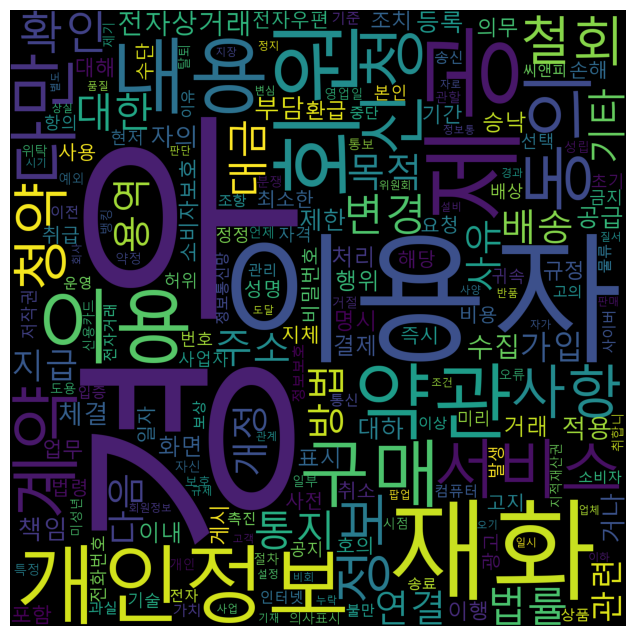

In [72]:
gen = wc.generate_from_frequencies(cnt)
plt.figure(figsize=(14,8))
plt.axis('off')
plt.imshow(gen)

In [75]:
# 특정한 이미지 모양대로 워드클라우드를 생성
img = Image.open('./pngwing.png')
# 이미지파일을 행렬식으로 변환
img_array = np.array(img)
img_array

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [76]:
wc2 = WordCloud(
    font_path='malgun',
    width=800,
    height=800,
    scale=2.0,
    max_font_size=350,
    max_words=200,
    mask= img_array
)

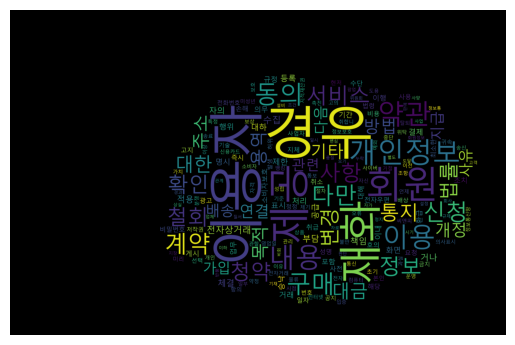

In [77]:
gen2 = wc2.generate_from_frequencies(cnt)
plt.axis('off')
plt.imshow(gen2)

In [78]:
import sys

In [79]:
sys.path

['c:\\apps\\jquery\\pandas',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\eungok\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']